In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('student_clustering.csv')

In [3]:
df.head(3)

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93


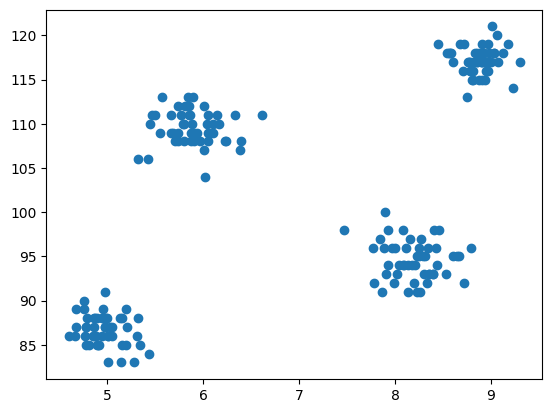

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(x = df['cgpa'], y = df['iq'])

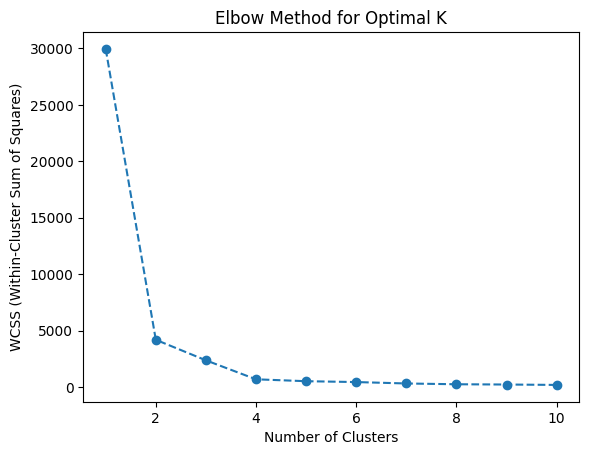

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans  # Corrected import name
import matplotlib.pyplot as plt  # To visualize WCSS graph

# Create an empty list to store Within-Cluster Sum of Squares (WCSS) values
wcss = []

# We need to determine the optimal number of clusters.

# Loop through different cluster sizes (1 to 10) to calculate WCSS

for i in range(1, 11):
    # Initialize K-Means clustering model
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Added initialization method

    # Fit the model to the dataset and predict cluster assignments

    km.fit(df)  # Removed `predict` since we only need fitting for WCSS computation

    # Append the inertia (WCSS) value for this number of clusters
    wcss.append(km.inertia_)

# Plot the WCSS values to visualize the "Elbow Method"

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [9]:
wcss

[29957.898287999997,
 4184.14127,
 2364.0055834200834,
 681.96966,
 514.1616803171115,
 437.48049222807015,
 312.1712145985568,
 242.41587382556412,
 219.53821381155853,
 184.00599197173167]

In [10]:
x = df.iloc[:,:].values

In [11]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x)

In [12]:
y_means

array([0, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 0,
       3, 0, 0, 3, 0, 1, 3, 2, 1, 2, 1, 2, 3, 3, 1, 2, 0, 2, 0, 3, 3, 0,
       1, 1, 3, 2, 1, 2, 0, 0, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 3, 0, 3, 3, 1, 3, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 1,
       3, 1, 2, 2, 3, 1, 3, 2, 1, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 2,
       0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       0, 3, 2, 1, 2, 3, 0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 1, 2, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 0, 1, 2,
       2, 1], dtype=int32)

In [15]:
x[y_means == 3,1]
x[y_means == 0,0]

array([5.13, 4.6 , 5.  , 4.86, 4.78, 4.96, 4.86, 5.44, 5.34, 5.31, 5.14,
       4.95, 5.21, 4.91, 5.28, 5.15, 4.9 , 4.89, 5.05, 4.98, 5.01, 4.95,
       4.96, 4.85, 4.76, 4.98, 4.78, 5.2 , 5.05, 5.01, 4.77, 4.68, 4.81,
       5.03, 4.98, 5.32, 4.86, 4.89, 4.88, 5.01, 4.67, 5.15, 4.97, 4.87,
       5.2 , 4.99, 4.79, 4.76, 4.78, 4.68])

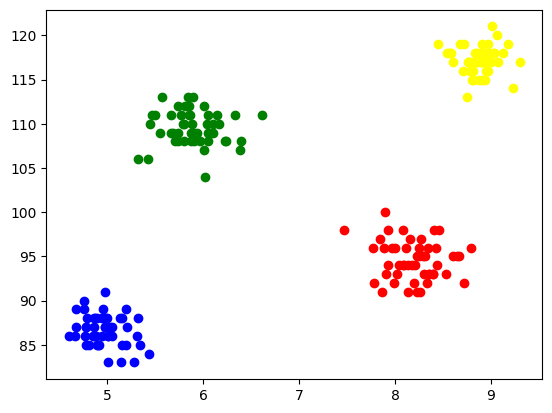

In [18]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color = 'blue')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], color = 'green')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], color = 'yellow')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], color = 'red')


In [23]:
# import numpy as np
from sklearn.datasets import make_blobs

# Define 3D centroids correctly
centroids = np.array([[-5, -5, 5], [5, 5, -5], [3.5, -2.5, 4], [-2.5, 2.5, -4]])

# Ensure standard deviations match the number of clusters
cluster_std = [1, 1, 1, 1]

# Generate blob data for clustering
X, y = make_blobs(n_samples=200, centers=centroids, cluster_std=cluster_std, random_state=1)

In [24]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [25]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [29]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

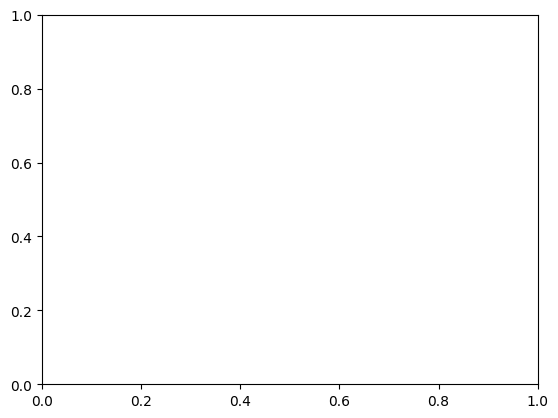

In [30]:
plt.plot(range(1,21),wscc)

In [31]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)
y_pred

array([0, 3, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 3, 0, 3, 2, 2, 2, 2, 1, 2,
       3, 1, 1, 0, 3, 2, 0, 3, 2, 0, 0, 1, 3, 0, 1, 3, 2, 2, 1, 3, 1, 0,
       3, 2, 2, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 2, 0, 1, 3, 3, 3, 2, 1,
       2, 0, 1, 3, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 1, 3, 3, 1, 3, 0, 1,
       1, 3, 0, 3, 3, 2, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 3, 3, 3, 2, 2, 3,
       2, 0, 2, 3, 2, 3, 1, 3, 2, 0, 1, 0, 2, 2, 3, 1, 2, 0, 2, 1, 2, 1,
       3, 1, 0, 2, 2, 0, 3, 3, 1, 0, 0, 3, 1, 0, 0, 1, 3, 0, 3, 0, 2, 2,
       0, 2, 1, 3, 2, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0,
       3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 3, 3, 0, 2, 2, 0, 3, 1,
       2, 3], dtype=int32)

In [33]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['Col2'] = X [:, 1]
df['col3'] = X[:,2]
# df['col4'] = X[:,3]
df['label'] = y_pred

In [34]:
df

,col1,Col2,col3,label
0,4.334245,3.325804,-4.174970,0
1,-3.322467,3.221711,-4.625342,3
2,-6.072969,-4.134592,2.698461,1
3,6.904659,6.111057,-4.340950,0
4,-2.608392,2.950156,-2.234665,3
...,...,...,...,...
195,4.712692,5.680070,-5.319802,0
196,-4.137450,6.458603,-3.351356,3
197,-5.208894,-4.413377,5.838983,1
198,2.619422,-2.779098,5.622849,2


In [35]:
fig = px.scatter_3d(x=df['col1'], y = df['Col2'], z = df['col3'])

In [36]:
fig.show()